# Figure 3: Independence

<div style="text-align: justify">
This is the code used to create **Figure 3** in the Apples with Apples paper [(Bonse et al. 2023)](../../05_citation.rst). The code illustrates how the use of apertures violates the independence assumption of the T-test.
</div>

## Imports

In [1]:
import os
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from applefy.utils.file_handling import read_apples_with_apples_root, \
    open_fits, load_adi_data
from applefy.gaussianity.residual_tests import extract_circular_annulus

## Data Loading

<div style="text-align: justify">
To illustrate the size of the speckles we load the unsaturated PSF. In order to run the code **make sure to download the data from Zenodo and [read the instructions](../02_paper_data.md) on how to setup the files**.
</div>

In [2]:
experiment_root = read_apples_with_apples_root()

Data in the APPLES_ROOT_DIR found. Location: /home/ipa/quanz/user_accounts/mbonse/2021_Metrics/70_results/apples_root_dir


In [3]:
dataset_file = experiment_root / Path("30_data/betapic_naco_lp_LR.hdf5")
science_data_key = "science_no_planet"
psf_template_key = "psf_template"
parang_key = "header_science_no_planet/PARANG"

dit_psf_template = 0.02019
dit_science = 0.2
fwhm = 4.2  # estimeated with Pynpoint in advance

In [4]:
# we need the psf template for contrast calculation
_, _, raw_psf_template_data = load_adi_data(
    dataset_file,
    data_tag=science_data_key,
    psf_template_tag=psf_template_key,
    para_tag=parang_key)

The unsaturated PSF template is very large, we crop it to 21 x 21 pixel.

In [5]:
psf_template_data = raw_psf_template_data[82:-82, 82:-82]

## Create the plot

This is a small helper function which is used to label the images of the PSF.

In [6]:
def plot_psf_with_positions(positions_in,
                            axis_in,
                            case_label):
    
    # Show the PSF
    axis_in.imshow(psf_template_data, 
                   vmin=-np.max(psf_template_data)*0.1, 
                   vmax=np.max(psf_template_data))
    
    axis_in.text(4, 2, case_label, ha="center", color="black",
                 bbox=dict(facecolor='white',
                           boxstyle="round",
                           edgecolor="black"),
                 fontsize=14)
    

    # Plot the Positions of the Apertures and pixel
    axis_in.scatter(positions_in[0],  
                    positions_in[1],
                    marker="o", s=1900,
                    edgecolor="white", 
                    lw=2, facecolor="None",
                    alpha=0.8)

    axis_in.scatter(positions_in[0],  
                    positions_in[1],
                    marker="x", s=50, 
                    color="white",
                    lw=3,
                    alpha=1)
    
    # Write Names of the Positions (Pixel)
    axis_in.text(positions_in[0][0], 
                 positions_in[1][0] - 5, "A", 
                 fontsize=16, fontweight="bold", ha="center",
                 color=sns.color_palette("colorblind")[1])
    
    axis_in.text(positions_in[0][1], 
                 positions_in[1][1] - 5, "B", 
                 fontsize=16, fontweight="bold",  ha="center",
                 color=sns.color_palette("colorblind")[1])
    
    axis_in.arrow(positions_in[0][0], 
                  positions_in[1][0] - 4, 
                  0, 2.5, lw=2, 
                  head_width=0.5, head_length=0.5,
                  color=sns.color_palette("colorblind")[1])
    
    axis_in.arrow(positions_in[0][1], 
                  positions_in[1][1] - 4, 
                  0, 2.5, lw=2, 
                  head_width=0.5, head_length=0.5,
                  color=sns.color_palette("colorblind")[1])
    
    # Write Names of the Positions (Apertures)
    axis_in.text(positions_in[0][0] - 3, 
                 positions_in[1][0] + 7, "A'", 
                 fontsize=16, fontweight="bold", ha="center",
                 color=sns.color_palette("colorblind")[4])
    
    axis_in.arrow(positions_in[0][0] - 2.5, 
                  positions_in[1][0] + 5, 
                  1.2, -2.3, lw=2, 
                  head_width=0.5, head_length=0.5,
                  color=sns.color_palette("colorblind")[4])
    
    axis_in.text(positions_in[0][1] + 3, 
                 positions_in[1][1] + 7, "B'", 
                 fontsize=16, fontweight="bold", ha="center",
                 color=sns.color_palette("colorblind")[4])
    
    axis_in.arrow(positions_in[0][1] + 2.5, 
                  positions_in[1][1] + 5, 
                  -1.2, -2.3, lw=2, 
                  head_width=0.5, head_length=0.5,
                  color=sns.color_palette("colorblind")[4])
    

    # Remove the axis 
    axis_in.axes.get_xaxis().set_ticks([])
    axis_in.axes.get_yaxis().set_ticks([])
    
    # Plot the horizontal line to mark the cut below
    axis_in.axhline(psf_template_data.shape[0]/2 - 0.5,
                    color="white", ls="--")

This is a small helper function which is used to create the sketches for Case 1 and Case 2.

In [8]:
psf_line = psf_template_data[:,10] - np.min(psf_template_data[:,10])
psf_line /= np.max(psf_line)

def plot_illustration(pos_A, 
                      pos_B,
                      shift,
                      axis_in):
    
    axis_in.plot(psf_line,
                 lw=3,label="Potential Speckle",
                 color = sns.color_palette("colorblind")[0])
    
    axis_in.set_xlim(2.1 + shift, len(psf_line) - 3.1 + shift)
    axis_in.set_ylim(0, 1.8)
    axis_in.axvline(pos_A, lw=3, 
                    color=sns.color_palette("colorblind")[1],
                    label="Pixel",)
    axis_in.axvline(pos_B, lw=3, 
                    color=sns.color_palette("colorblind")[1])
    
    axis_in.axvline(pos_A, lw=114, 
                    color=sns.color_palette("colorblind")[4], alpha=0.2)
    axis_in.axvline(pos_B, lw=114, 
                    color=sns.color_palette("colorblind")[4], alpha=0.2)
    
    # Aperture area
    line = plt.Line2D(
        (pos_A - 2.03, pos_A + 2.03), 
        (0.3, 0.3), lw=3, mew=3, 
        color=sns.color_palette("colorblind")[4])#, 
        #marker="|", ms=10)

    axis_in.add_line(line)
    axis_in.axvline(pos_A - 2.05, lw=2, 
                    color=sns.color_palette("colorblind")[4])
    axis_in.axvline(pos_A + 2.05, lw=2, 
                    color=sns.color_palette("colorblind")[4])
    
    line = plt.Line2D(
        (pos_B - 2.03, pos_B + 2.03), 
        (0.3, 0.3), lw=3, mew=3, label="Aperture",
        color=sns.color_palette("colorblind")[4])#, 
        #marker="|", ms=10)

    axis_in.add_line(line)
    
    axis_in.axvline(pos_B - 2.05, lw=2, 
                    color=sns.color_palette("colorblind")[4])
    axis_in.axvline(pos_B + 2.05, lw=2, 
                    color=sns.color_palette("colorblind")[4])
    
    # Add all labels
    axis_in.text(pos_A, 1.4, "A", 
                 ha="center", size=16,
                 color=sns.color_palette("colorblind")[1],
                 va="center", fontweight="bold",
                 bbox=dict(facecolor='white',
                           boxstyle="round",
                           edgecolor="white"))
    
    axis_in.text(pos_A - 1.3, 1.4, "A'", 
                 ha="center", size=16, 
                 color=sns.color_palette("colorblind")[4],
                 va="center", fontweight="bold",
                 bbox=dict(facecolor='white',
                           boxstyle="round",
                           edgecolor="white"))
    
    axis_in.text(pos_B, 1.4, "B", 
                 ha="center", size=16, 
                 color=sns.color_palette("colorblind")[1],
                 va="center", fontweight="bold",
                 bbox=dict(facecolor='white',
                           boxstyle="round",
                           edgecolor="white"))
    
    axis_in.text(pos_B + 1.3, 1.4, "B'", 
                 ha="center", size=16, 
                 color=sns.color_palette("colorblind")[4],
                 va="center", fontweight="bold",
                 bbox=dict(facecolor='white',
                           boxstyle="round",
                           edgecolor="white"))
    
    axis_in.axis("off")

Create the final plot.

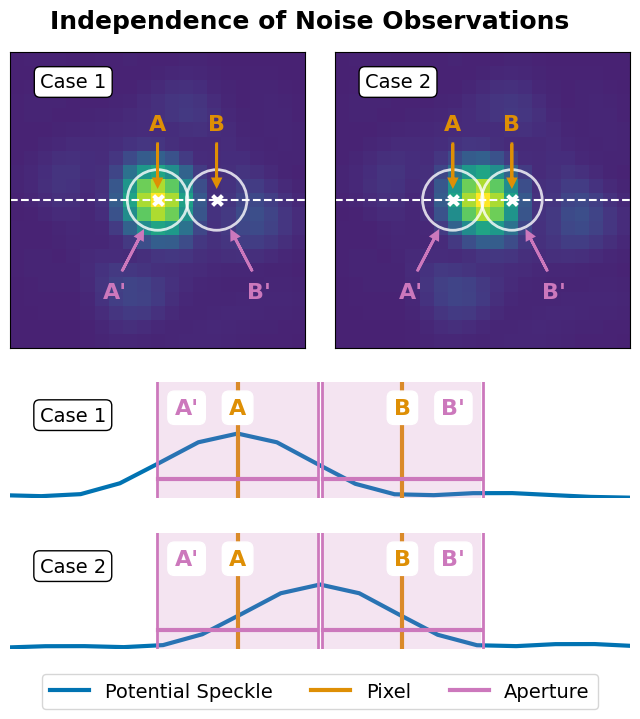

In [9]:
# 1.) Make the plot gridlayout 
fig = plt.figure(constrained_layout=False, 
                 figsize=(8, 8))
gs0 = fig.add_gridspec(2, 1, height_ratios=[2.5, 2])
gs0.update(hspace=0.05, wspace=0.15)

gs1 = gridspec.GridSpecFromSubplotSpec(1, 2, 
                                       subplot_spec=gs0[0],
                                       hspace=0., wspace=0.1,
                                       width_ratios=[1, 1])

gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, 
                                       subplot_spec=gs0[1],
                                       hspace=0.3, wspace=0.1,
                                       height_ratios=[1, 1])

ax_psf_case1 = fig.add_subplot(gs1[0])
ax_psf_case2 = fig.add_subplot(gs1[1])
ax_illustration1 = fig.add_subplot(gs2[0])
ax_illustration2 = fig.add_subplot(gs2[1])


# 2.) Plot the unsaturated PSF with apertures on top of it
plot_psf_with_positions(([10, 10 + 4.2], [10,10],), 
                        ax_psf_case1, "Case 1")
plot_psf_with_positions(([10 - 2.1, 10 + 2.1], [10,10],), 
                        ax_psf_case2, "Case 2")

# 3.) Plot the illustrations for Case 1 and Case 2
plot_illustration(10, 10 + 4.2, 2.1,  ax_illustration1)
plot_illustration(10 - 2.1, 10 + 2.1, 0, ax_illustration2)

plt.setp(ax_illustration1.get_xticklabels(), visible=False)

ax_illustration1.text(3.7 + 2.1, 1.2, "Case 1", ha="center", color="black",
                      fontsize=14, #fontweight="bold",
                      bbox=dict(facecolor='white',
                                boxstyle="round",
                                edgecolor="black"))

ax_illustration2.text(3.7, 1.2, "Case 2", ha="center", color="black",
                     fontsize=14, #fontweight="bold",
                     bbox=dict(facecolor='white',
                               boxstyle="round",
                               edgecolor="black"))

# 4.) Add a legend
lgd = ax_illustration2.legend(ncol=3, fontsize=14, 
                              loc='lower center',
                              bbox_to_anchor=(0.5, -0.6))

st = fig.suptitle("Independence of Noise Observations", 
                  fontsize=18, fontweight="bold", y=0.91)

# 5.) Save the figure
fig.patch.set_facecolor('white')
plt.savefig("./03_Independence.pdf", 
            bbox_extra_artists=(lgd, st), 
            bbox_inches='tight')